# Introduction to Machine Learning & Decision Trees Lesson

## <b>Goals</b>

- Build from scratch our own machine learning algorithm that we'll use to train on the iris dataset.

- Decision Trees algorithm.
    - Our very first machine learning algorithm. Learn how it works and how to use it.

### Building our own machine learning classifier with the iris dataset.

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load in the iris dataset from seaborn
iris = sns.load_dataset("iris")

#Look at first five rows
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#Data size
iris.shape

(150, 5)

In [4]:
#What are the classes of the target variable?
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Our mission is to create a model that can differentiate between the three classes using the features of sepal length, sepal width, petal length, and petal width.

#### Time for some quick EDA.

In [5]:
#Group the data by species and derive the average values of each attribute in each category
iris.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


What does this tell us about the differences and similarities of each species?

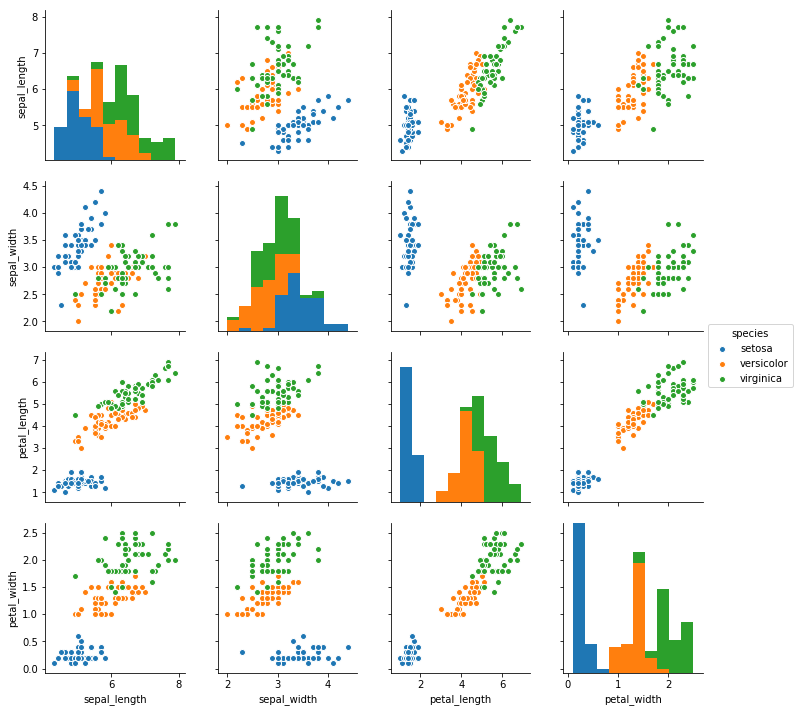

In [6]:
#Use a pairplot to visualize the dataset and use the species column to color encode the plots
sns.pairplot(iris, hue="species");

Again what does this tell us? How can we use this plot to our advantage when we create our machine learning model? What are the vertical and horizontal boundaries between the classes?

#### Building the model from scratch

Plan: 
- Build a function that uses control flow to make predictions. 
    - If feature A is less than 3 then return class 1, if not then return class 2.
    - If feature B is greater than 4, check to see if feature C  is greater than 1, if so then return class 3, if not then return class 1.
    
- Use EDA to determine the decision boundaries for this model. If petal_length > 5 then return class ? Or check other conditions.

- Make a python function that uses our decision boundaries and apply it to our dataframe. Measure the accuracy of our "model."

7 minute exercise: Work with a partner to determine the boundaries. Don't worry about coding a function, take notes on your boundaries.

Be prepared to share your boundary coordinates.

x.feature_name allow us to apply function to data frame as opposed to a series.

In [7]:
#Simple version of model
def iris_model(x):
    
    if x.petal_length < 2.5:
        return "setosa"
    
    else:
        if x.petal_width > 1.75:
            return "virginica"
        else:
            return "versicolor"

Apply model on to iris data frame.

In [8]:
#Use model on data by caling the .apply() method on the iris data frame with axis = 1
#Assign it to variable called preds

preds = iris.apply(iris_model, axis = 1)

In [9]:
#Take a look at the predictions
preds

0          setosa
1          setosa
2          setosa
3          setosa
4          setosa
5          setosa
6          setosa
7          setosa
8          setosa
9          setosa
10         setosa
11         setosa
12         setosa
13         setosa
14         setosa
15         setosa
16         setosa
17         setosa
18         setosa
19         setosa
20         setosa
21         setosa
22         setosa
23         setosa
24         setosa
25         setosa
26         setosa
27         setosa
28         setosa
29         setosa
          ...    
120     virginica
121     virginica
122     virginica
123     virginica
124     virginica
125     virginica
126     virginica
127     virginica
128     virginica
129    versicolor
130     virginica
131     virginica
132     virginica
133    versicolor
134    versicolor
135     virginica
136     virginica
137     virginica
138     virginica
139     virginica
140     virginica
141     virginica
142     virginica
143     virginica
144     vi

Accuracy score metric: The percentage of correct predictions. Number of correct divided by total number of predictions.

In [10]:
#Write a function that tests the accuracy of the predictions

def model_tester(labels, predictions):
    #Assumes labels and predictions are the same  
    correct = sum(labels == predictions)
    return correct/len(labels)

The big moment!!

In [11]:
#Assign species column to y 
y = iris.species

#Pass the labels and predictions in to the model_tester function
#Assign result to accuracy_score variable
accuracy_score = model_tester(y, preds)

print ("The model correctly classified {} percent of the data.".format(accuracy_score*100))

The model correctly classified 96.0 percent of the data.


### <b> CONGRATULATIONS ON MAKING YOUR FIRST SUCCESSFUL MACHINE LEARNING MODEL!! <b>

Let's a closer look to see what we got right and wrong. We are going to compare and contrast the labels and our predictions.

In [13]:
#Use pd.crosstab() to make a cross-tabulated data frame of the labels and predictions
pd.crosstab(y, preds,margins=True)

col_0,setosa,versicolor,virginica,All
species,,,,
setosa,50,0,0,50
versicolor,0,49,1,50
virginica,0,5,45,50
All,50,54,46,150


The actual labels are the index values and the predicted labels are the columns. Known as a <b>confusion matrix</b>.
<br><br>
What does this tell us about our model?

Questions so far???

### Decision Trees

- One of the most popular and oldest machine learning models.
- Both a classification and regression supervised model.
- Intuitive. Very obvious why it's called "Decision Trees." 
- Foundation is asking a series of questions designed to zero-in on the classification. Sound familiar? (Hint: 20 questions.)
- Gateway model to more complex models such as Random Forests and Gradient Boosting.

Agenda: 

- Interpret a tree diagram
- Explain how a decision tree is created
- Build a decision tree model in scikit-learn

#### How a Decision Tree works
What makes Decision Trees great is that you can see the process in how it determines a classification.
<br><br>
Below is a decision tree that models data from the 2008 Democratic primary. It is predicting whether or not a county voted for Hillary Clinton or Barack Obama based on demographics and other features.

![Stuff](https://static01.nyt.com/images/2008/04/16/us/0416-nat-subOBAMA.jpg)

**Important:**

- What are the observations? How many observations are there?
- What is the response variable?
- What are the features?
- How are the predictions made?
- What is the most predictive feature?

The first split is "County > 20% Black Population". In this example, when a splitting rule is <b>True</b>, the model follows the right branch and when the splitting rule is <b>False</b>, it follows the left branch. 

#### Which candidate would the model predict winning this county?
15% Black, 82% HS graduation rate, located in Michigan, 60% earned less than $30,000
<br><br>
Whats the probability for this prediction?

- Number of questions indicates the depth of the model, which measures the complexitiy of a model. 
- Model splits until every observation that satisfies a series of conditions is of the same class or until the model reaches the maximum depth.
- Setting a maximum depth is known as "pruning" and not setting one or choosing too big of one can lead to overfitting.

<b> Why did this model make those decisions? Why is fewer than 20% black the first decision? Why 20% instead of 16 or 25?</b>
- At each node, we choose the decision that provides the best split, this is known as maximixing the information gain.
- The point where the split is made is determined by which point yields the lowest gini coefficient which measures the quality of a split (0 means perfect split.)
- Order of decisions is based on feature importance. The first decision is made on the model's most important feature. Very valuable method for feature selection and engineering.

### Decision Tree Classifier with Sklearn

In [14]:
#Import model from scikit learn library
from sklearn.tree import DecisionTreeClassifier


In [22]:
#We're going to use sklearn to make some fake data.
from sklearn.datasets import make_classification

#Generate fake data that is 500 x 2.
data = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, 
                    class_sep=.70, random_state = 14)

In [23]:
# data[0] is the features
# data[1] is the labels

In [24]:
#Convert to pandas data frame
df = pd.DataFrame(data[0], columns=["feature1", "feature2"])
#Add target variable to df 
df["target"] = data[1]

df.head()

,feature1,feature2,target
0,2.460254,-0.150278,1
1,-0.258220,0.690372,0
2,-0.281986,0.605123,1
3,0.014806,-0.542869,0
4,2.353531,-2.818020,0


Let's plot data with its color-encoded labels. Try to imagine how a decision tree would classify this data. Remember decision trees boundaries are vertical or horizontal.

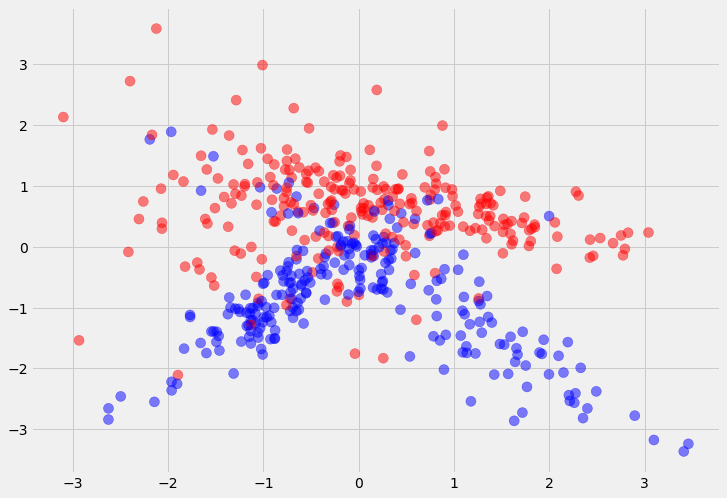

In [25]:
#Call scatter plot of feature1 vs feature2 with color-encoded target variable
plt.style.use("fivethirtyeight")
plt.figure(figsize=(11, 8))
#Color encode target variable
colors = df.target.map({0:"b", 1:"r"})
plt.scatter(df.feature1, df.feature2, c = colors, s = 100, alpha=.5);

Start thinking about how a model would classify red vs blue.

Time to see what the model says.
<br><br>
We are going to use the data to <b>train</b> or <b>fit</b> the model. The empty model "learns" from the data.

In [26]:
#Assign features to variable X
X = df.drop("target", axis = 1)
#Assign target column to variable y
y = df.target

#Fit a Decision Tree model with 2 depth on the data.

#1. Intialize the model, set max_depth = 2
model = DecisionTreeClassifier(max_depth=2)
#2. Fit/train the model. 
model.fit(X, y)

#The model specifications 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Prediction time.

In [27]:
#Call predict on model and pass new data
model.predict([[0,0]])

array([0])

What if you want the probabilities of each class?

In [28]:
#Call predict_proba()
model.predict_proba([[0,0]])

array([[0.64367816, 0.35632184]])

How strong is the prediction for each class?

Check how good our model by scoring the predictions

In [29]:
#Call .score() on model object and pass in the features and labels
model.score(X, y)

0.836

This is what's known as the accuracy score or the percentage of prediction we got correct.

In [30]:
#Another way to do this

#Make predictions on the features
preds = model.predict(X)

#Sum up all the rows that match and divide by total number of rows
sum(preds == y)/float(X.shape[0])

0.836

In [32]:
#Using sklearn accuracy score function
from sklearn.metrics import accuracy_score
accuracy_score(y, preds)

0.836

Now we're going to use a plotting function to visualize the model.

What do you think that means?

In [33]:
#Retrain model but this time with depth 3
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [34]:
def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    plt.rcParams["figure.figsize"] = (10,7)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y, alpha=0.4, s = 50)

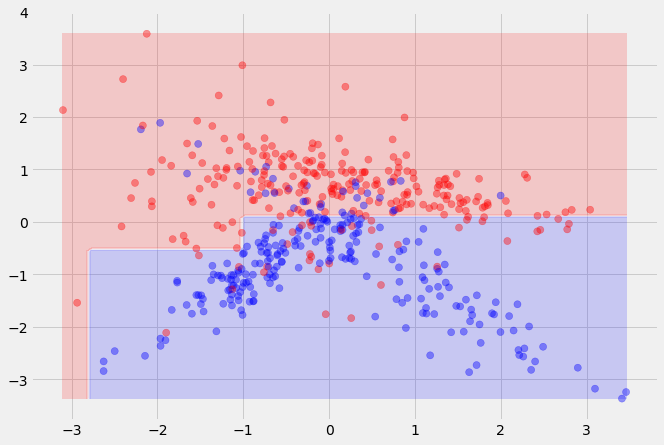

In [35]:
#Pass in model and data into function.
#Input a pretrained model, then features, then color-encoded target variables
plot_decision_boundary(model, X.values, colors);

Voila! These are the decision boundaries of decision tree model.

More examples of decision tree boundaries

Four blobs 

![Example1](https://image.ibb.co/m9EjYG/decisionblobs.png)



Credit: [Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/)

Observe how different decision tree models with varying depth values interpret the data.

![Blobs](https://image.ibb.co/hRE7nb/decisionblobboundaries.png)
Credit: Jake VanderPlas

### Back to Iris dataset/tree visualization

<br><br>
We're going to train a decision tree model on the iris dataset and then use visualize the actual decision tree.

In [36]:
#Assign iris features to X and species to y

X = iris.drop("species", axis=1)
y = iris.species

In [37]:
#Fit decision tree model on iris data with max depth set to 3

iris_model = DecisionTreeClassifier(max_depth=3)
iris_model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [38]:
#Score the model.
iris_model.score(X, y)

0.9733333333333334

Pretty good right? A little bit better than our hand-coded model

Visualize the decision trees using graphviz

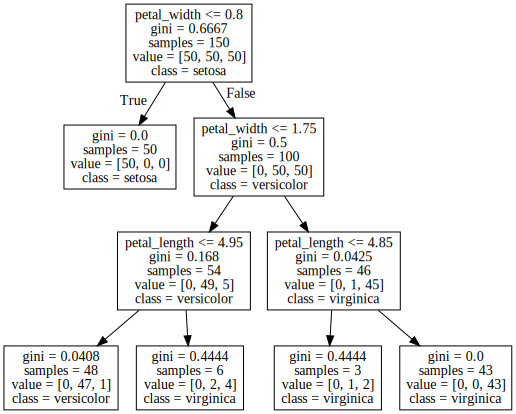

In [39]:
#imports
from sklearn.tree import export_graphviz
import graphviz

#Export the decision tree graph viz object. We have to export and the re-import it
export_graphviz(iris_model, out_file='iris.dot', 
                    feature_names=X.columns, 
                    class_names=y.unique())
with open("iris.dot") as f: 
        dot_graph = f.read()
graphviz.Source(dot_graph)

## Notes and resources

### Decision trees pros and cons:
<br><br>
**Advantages of decision trees:**
- Can be used for regression or classification
- Can be displayed graphically
- Highly interpretable
- Can be specified as a series of rules, and more closely approximate human decision-making than other models
- Prediction is fast
- Features don't need scaling
- Automatically learns feature interactions
- Tends to ignore irrelevant features
- Non-parametric (will outperform linear models if relationship between features and response is highly non-linear)

**Disadvantages of decision trees:**
- Performance is (generally) not competitive with the best supervised learning methods (low bias)
- Can easily overfit the training data (tuning is required)
- Small variations in the data can result in a completely different tree (high variance)
- Recursive binary splitting makes "locally optimal" decisions that may not result in a globally optimal tree
- Doesn't tend to work well if the classes are highly unbalanced
- Doesn't tend to work well with very small datasets

### BONUS Gini section
<br><br>
Common options for the splitting criteria:

- **classification error rate:** fraction of training observations in a region that don't belong to the most common class
- **Gini index:** measure of total variance across classes in a region

#### Example of classification error rate

Pretend we are predicting whether someone buys an iPhone or an Android:

- At a particular node, there are **25 observations** (phone buyers), of whom **10 bought iPhones and 15 bought Androids**.
- Since the majority class is **Android**, that's our prediction for all 25 observations, and thus the classification error rate is **10/25 = 40%**.

Our goal in making splits is to **reduce the classification error rate**. Let's try splitting on gender:

- **Males:** 2 iPhones and 12 Androids, thus the predicted class is Android
- **Females:** 8 iPhones and 3 Androids, thus the predicted class is iPhone
- Classification error rate after this split would be **5/25 = 20%**

Compare that with a split on age:

- **30 or younger:** 4 iPhones and 8 Androids, thus the predicted class is Android
- **31 or older:** 6 iPhones and 7 Androids, thus the predicted class is Android
- Classification error rate after this split would be **10/25 = 40%**

The decision tree algorithm will try **every possible split across all features**, and choose the split that **reduces the error rate the most.**

#### Example of Gini index

Calculate the Gini index before making a split:

$$1 - \left(\frac {iPhone} {Total}\right)^2 - \left(\frac {Android} {Total}\right)^2 = 1 - \left(\frac {10} {25}\right)^2 - \left(\frac {15} {25}\right)^2 = 0.48$$

- The **maximum value** of the Gini index is 0.5, and occurs when the classes are perfectly balanced in a node.
- The **minimum value** of the Gini index is 0, and occurs when there is only one class represented in a node.
- A node with a lower Gini index is said to be more "pure".

Evaluating the split on **gender** using Gini index:

$$\text{Males: } 1 - \left(\frac {2} {14}\right)^2 - \left(\frac {12} {14}\right)^2 = 0.24$$
$$\text{Females: } 1 - \left(\frac {8} {11}\right)^2 - \left(\frac {3} {11}\right)^2 = 0.40$$
$$\text{Weighted Average: } 0.24 \left(\frac {14} {25}\right) + 0.40 \left(\frac {11} {25}\right) = 0.31$$

Evaluating the split on **age** using Gini index:

$$\text{30 or younger: } 1 - \left(\frac {4} {12}\right)^2 - \left(\frac {8} {12}\right)^2 = 0.44$$
$$\text{31 or older: } 1 - \left(\frac {6} {13}\right)^2 - \left(\frac {7} {13}\right)^2 = 0.50$$
$$\text{Weighted Average: } 0.44 \left(\frac {12} {25}\right) + 0.50 \left(\frac {13} {25}\right) = 0.47$$

Again, the decision tree algorithm will try **every possible split**, and will choose the split that **reduces the Gini index (and thus increases the "node purity") the most.**

#### Decision tree resources
- http://dataaspirant.com/2017/01/30/how-decision-tree-algorithm-works/
- http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/
- https://www.youtube.com/watch?v=eKD5gxPPeY0&t=7s
- https://github.com/josiahdavis/DecisionTrees/blob/master/DecisionTrees.ipynb
- https://www.talend.com/blog/2016/09/29/machine-learning-made-easy-with-talend-decision-trees/
- https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/

#### Machine learning resources

- Intro to ML in sklearn http://scikit-learn.org/stable/tutorial/basic/tutorial.html
- https://www.digitalocean.com/community/tutorials/an-introduction-to-machine-learning
- https://www.toptal.com/machine-learning/machine-learning-theory-an-introductory-primer
- https://www.youtube.com/watch?v=IpGxLWOIZy4
- https://www.analyticsvidhya.com/blog/2015/06/machine-learning-basics/
- [Visual introduction to machine learning](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
- Great series -> https://medium.com/machine-learning-for-humans/why-machine-learning-matters-6164faf1df12
